In [39]:
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt 

In [5]:
df = pd.read_csv('../data/data.csv')
df.info()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2540,1000,Healthcare,Yu Rong,51.0,China,Shanghai,Health clinics,Healthcare,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2636,2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Beer,Food & Beverage,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2637,2540,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2638,2540,1000,Real Estate,Zhang Guiping & family,71.0,China,Nanjing,Real estate,Real Estate,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397


rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

<Axes: >

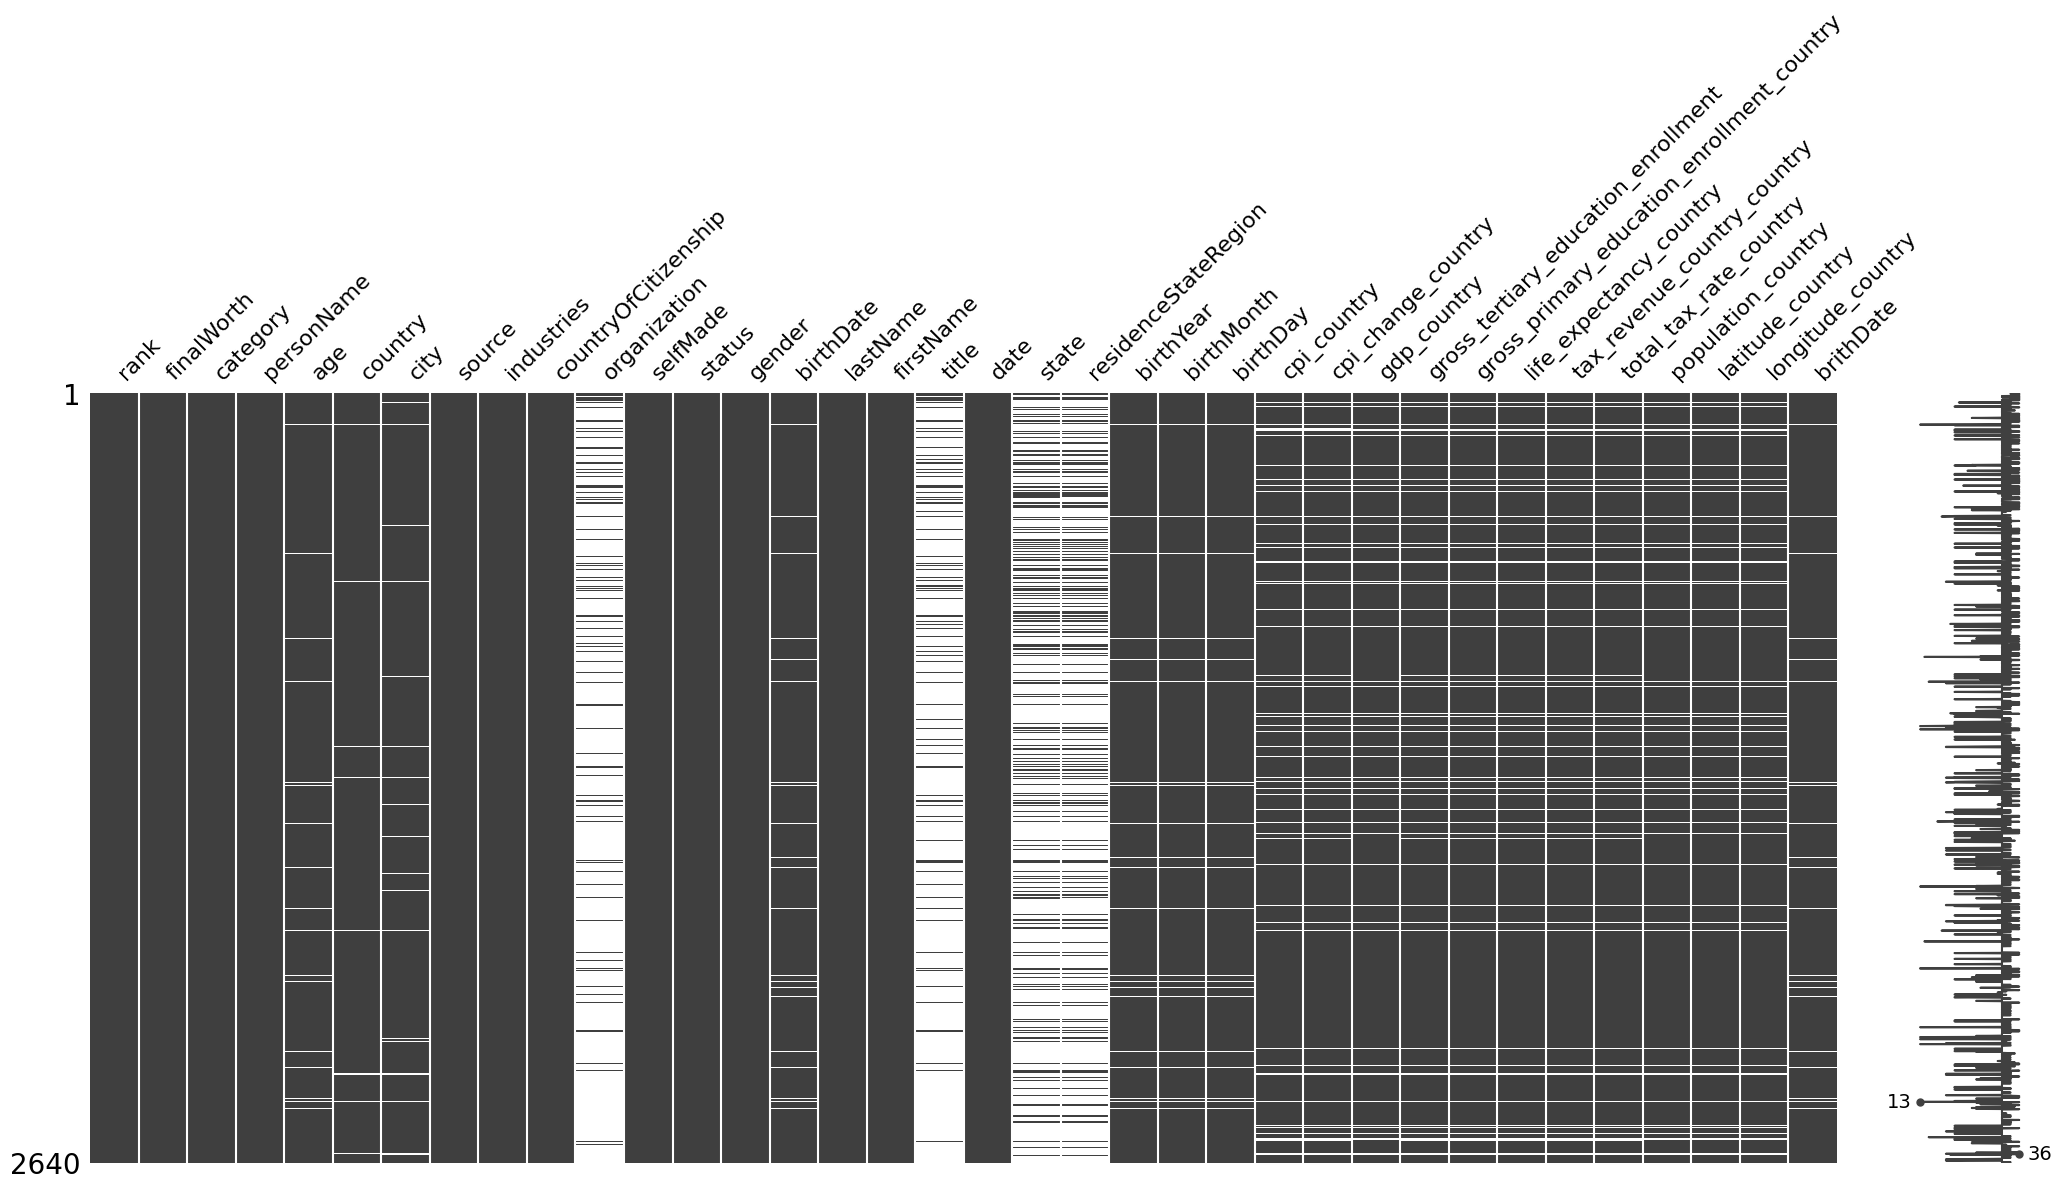

In [94]:
print(df.isnull().sum())
msno.matrix(df) # or msno.bar()

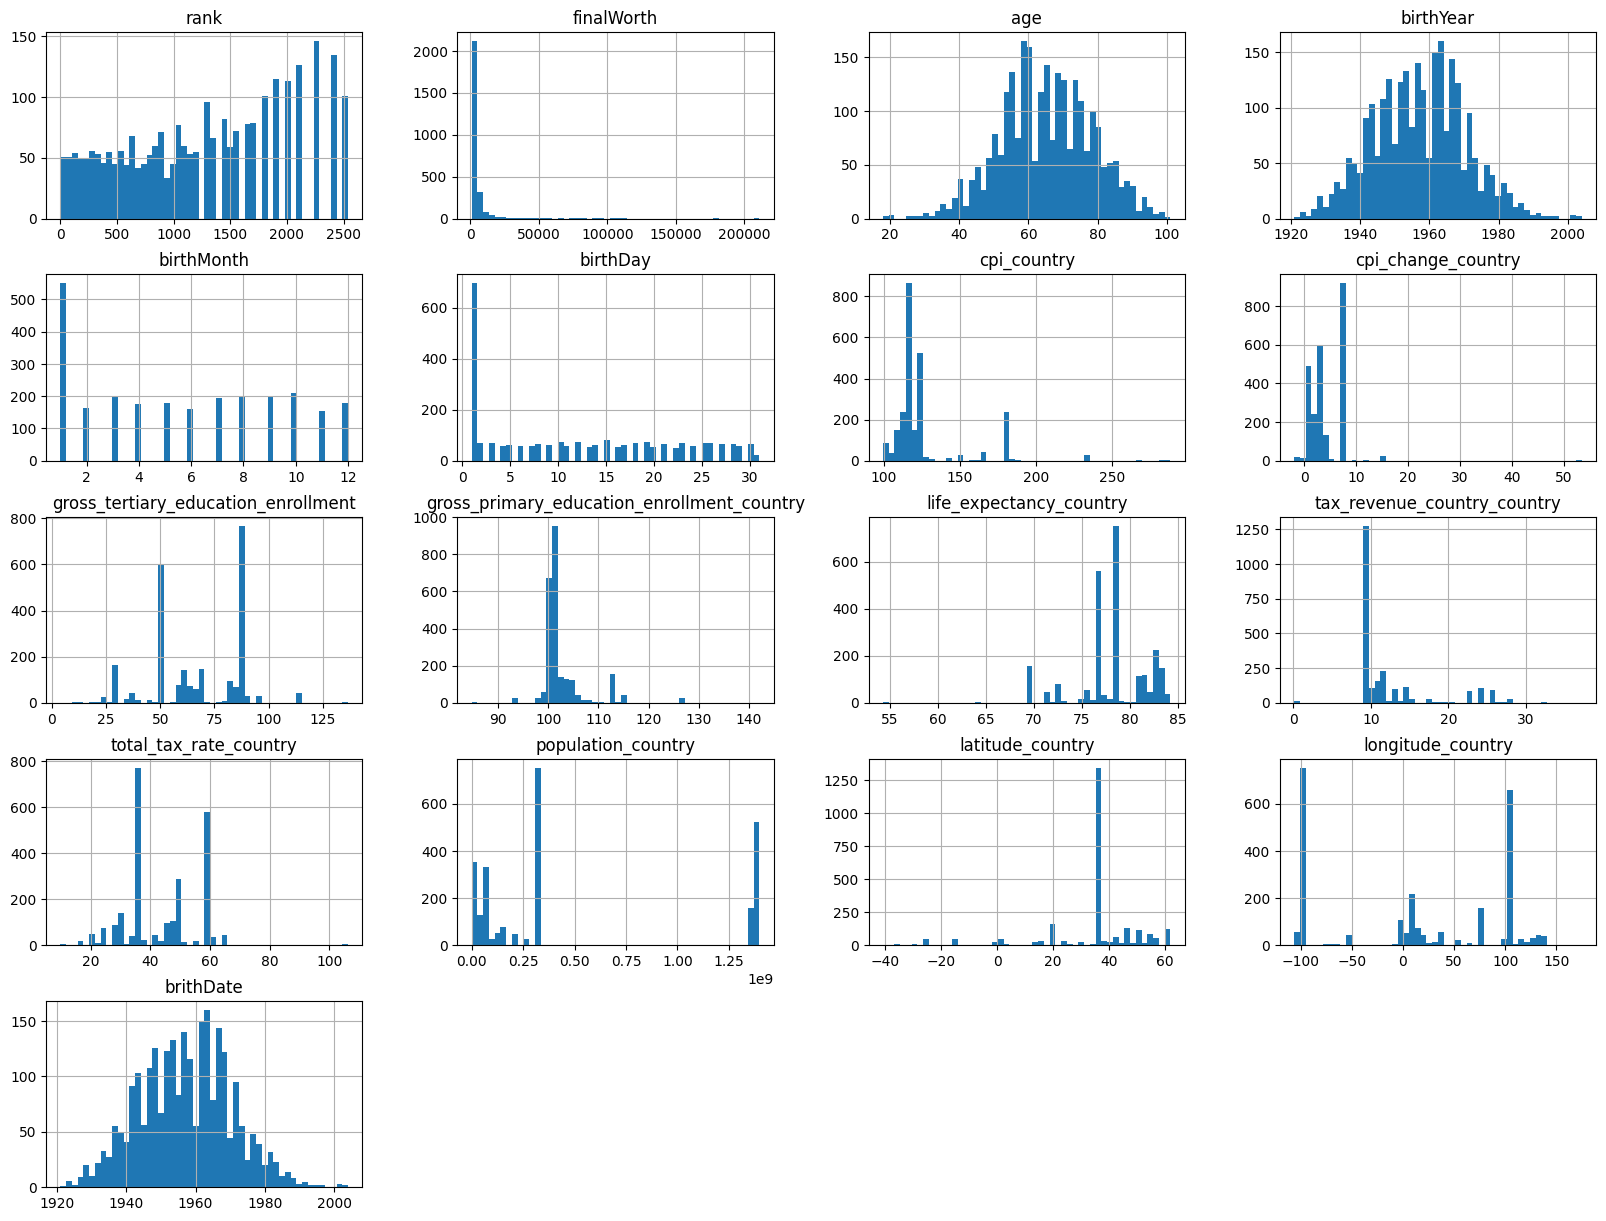

In [45]:
df.hist(bins=50, figsize=(20,15))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

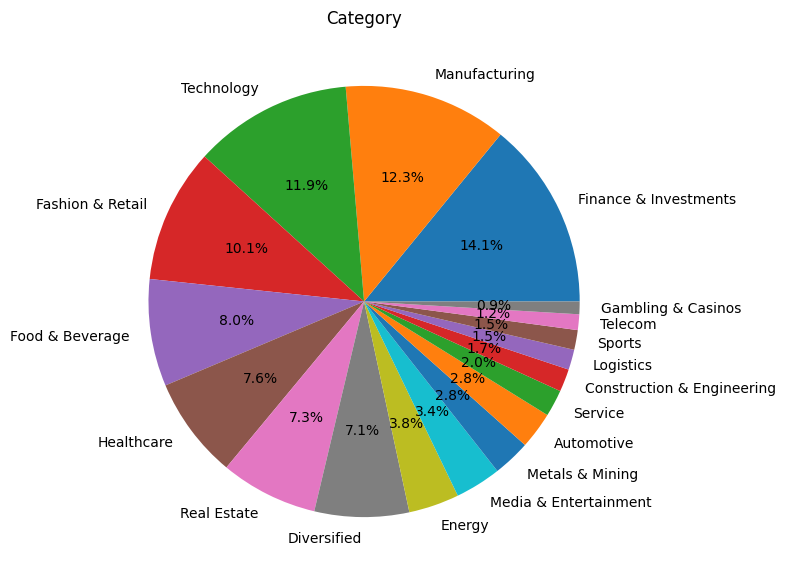

In [49]:
# 직업 카테고리
category = df['category'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(category,labels=category.index, autopct='%1.1f%%')
plt.title('Category')
plt.show

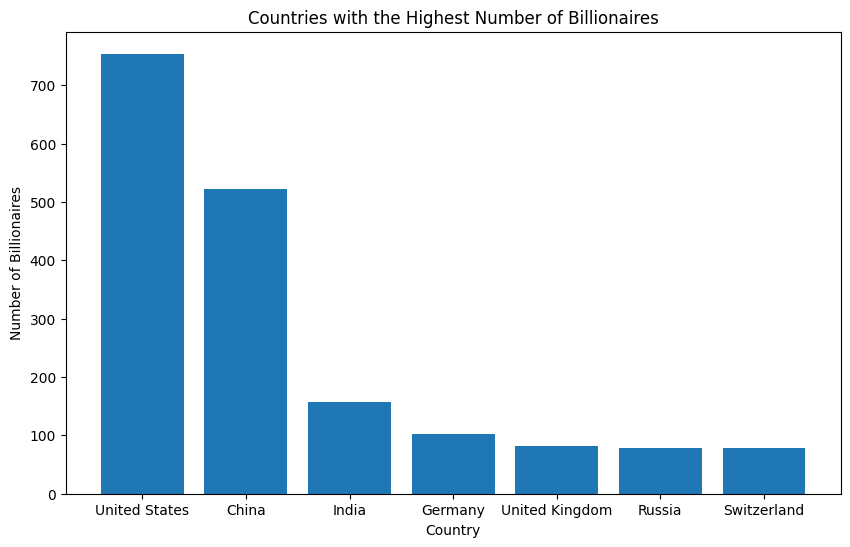

In [91]:
# 억만장자 거주나라
countries = df['country'].value_counts().head(7)
plt.figure(figsize=(10, 6))
plt.bar(countries.index, countries.values)
plt.xlabel('Country')
plt.ylabel('Number of Billionaires')
plt.title('Countries with the Highest Number of Billionaires')
plt.show()

In [93]:
# 지도통해서 데이터 시각화 돌리지 않아도 괜찮습니다.
import pandas as pd
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster

spatial_data = df[['latitude_country','longitude_country','country']]
spatial_data=spatial_data.dropna()

data = spatial_data.copy()
data = data.rename(columns={'latitude_country': 'Latitude',
                        'longitude_country': 'Longitude',
                        'country':'Country'})

# Group by country and count the number of billionaires
billionaires_count = data.groupby('Country').size().reset_index(name='Billionaires')

# Load world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge world map with billionaires count data
world = world.merge(billionaires_count, how='left', left_on='name', right_on='Country')

# Fill missing values with 0 (for countries without billionaires)
world['Billionaires'] = world['Billionaires'].fillna(0)

# Create choropleth map
m = folium.Map(location=[30, 0], zoom_start=2)

folium.Choropleth(
    geo_data=world,
    name='choropleth',
    data=billionaires_count,
    columns=['Country', 'Billionaires'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Billionaires',
).add_to(m)

# Add markers for individual billionaires (optional)
marker_cluster = MarkerCluster().add_to(m)
for index, row in data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f'Country: {row["Country"]}',
        icon=None  # You can customize the marker icon here
    ).add_to(marker_cluster)

# Display the map
m.save('billionaires_map.html')
m

C:\Users\zpdlc\AppData\Local\Temp\ipykernel_27272\273355120.py:18: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


oganization -> city & country & industries로 추론해보려 했으나 3가지 컬럼이 같아도 다른 회사인 경우 많아 삭제

firstname 결측값이 적어 직접 인터넷 검색

country는 평균 미국이 많기 때문에 미국으로 대체

city는 각 coutry 및 state를 확인 없다면 coutry에서 가장많은 city로 대체

age,month -> 추론 가능 데이터 없음 age가 비어있는 인원은 다른 값들도 많이 비워져 있음 및 정규분포 데이터이므로 mean값으로 대체

country 결측값들은 county 같은 인원들을 뽑아 mean 값으로 처리 하려했으나 country 없는 데이터는 다른 데이터 결측값도 많아 드랍

title -> 중요한 정보이나 추론 가능성 모르겠음

rank -> index와 같은 역할 삭제

birthDate,birthYear,brithDay -> age가 있으므로 삭제 Month는 사용

state -> 미국이 아닌경우 추론 불가 좋은 데이터이나 미국에만 적용되므로 삭제

residenceStateRegion -> country 또는 state랑 같은 부분이라 삭제

personName -> fistname이랑 겹치므로 삭제

date 수집날짜는 같은 날짜 시간만 다르기 때문에 삭제

latitude_country, longitude_country 위도 경도 삭제? -> 추후 결정

In [ ]:
def get_X(df:pd.DataFrame):
  '''Make feature vectors from a DataFrame.

  Args:
      df: DataFrame
      features: selected columns
  '''
  df['age'].fillna(df['age'].mean(), inplace=True)
  
  # 나이 10대 별로 분배
  def category_age(x):
        if x < 10:
            return 0
        elif x < 20:
            return 1
        elif x < 30:
            return 2
        elif x < 40:
            return 3
        elif x < 50:
            return 4
        elif x < 60:
            return 5
        elif x < 70:
            return 6
        else:
            return 7

  df['age'] = df['age'].apply(category_age)
  # 필요없는 columns delete
  # .dropna(thresh=int(len(data)*0.5),axis=1) 50% 이상 데이터가 없을 경우 삭제
  df.drop(['title','rank','state','residenceStateRegion','date','personName','brithDate'], axis=1, inplace=True)
  pd.get_dummies(df['selfMade','status','gender','category','age','birthMonth']).to_numpy(dtype=np.float32)
  return pd.get_dummies(df)

def get_y(df:pd.DataFrame):
  '''Make the target from a DataFrame.

  Args:
      df: DataFrame
  '''
  df['selfMade']
  return df.Survived.to_numpy(dtype=np.float32)

In [ ]:
X_trn = get_X(df)
y_trn = get_y(df)